In [38]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, r2_score, plot_roc_curve
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
plt.style.use('seaborn-dark')

In [25]:
customers = pd.read_csv('cleaned_data/imputed_customers.csv')
X = customers[['age','income','membership_years','weekly_transactions','weekly_amount_spent']]
X.head()

,age,income,membership_years,weekly_transactions,weekly_amount_spent
0,55.0,112000.0,1.030137,0.75,19.2525
1,75.0,100000.0,1.213699,1.75,39.8175
2,68.0,70000.0,0.249315,0.75,14.4325
3,65.0,53000.0,0.457534,0.75,9.1075
4,58.0,51000.0,0.704110,1.00,3.9050


In [26]:
# Scale X
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA and fit the features selected
pca = PCA(n_components=2).fit(X)

# Transform samples using the PCA fit
pca_2d = pca.transform(X)

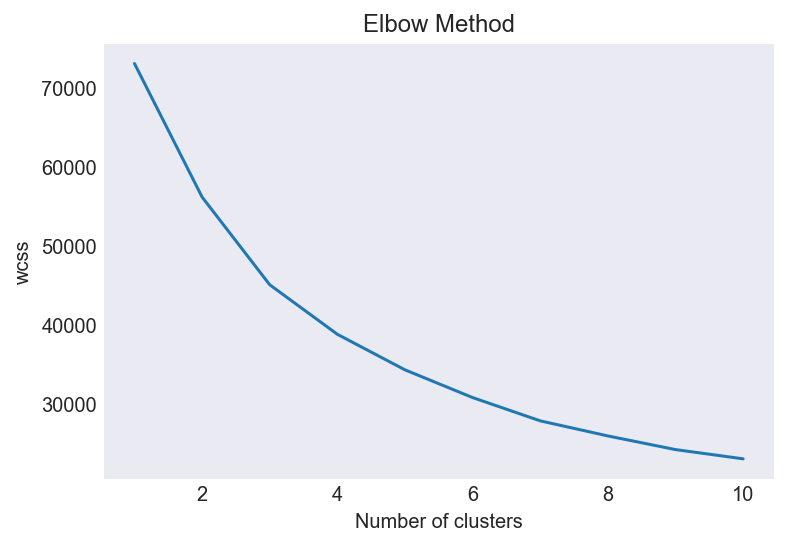

In [27]:
# Use the elbow method
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [28]:
# Kmeans algorithm
# n_clusters: Number of clusters. In our case 5
# init: k-means++. Smart initialization
# max_iter: Maximum number of iterations of the k-means algorithm for a single run
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state: Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=4)

# Fit and predict 
y_means = kmeans.fit_predict(X)

customers['cluster'] = kmeans.fit_predict(X)

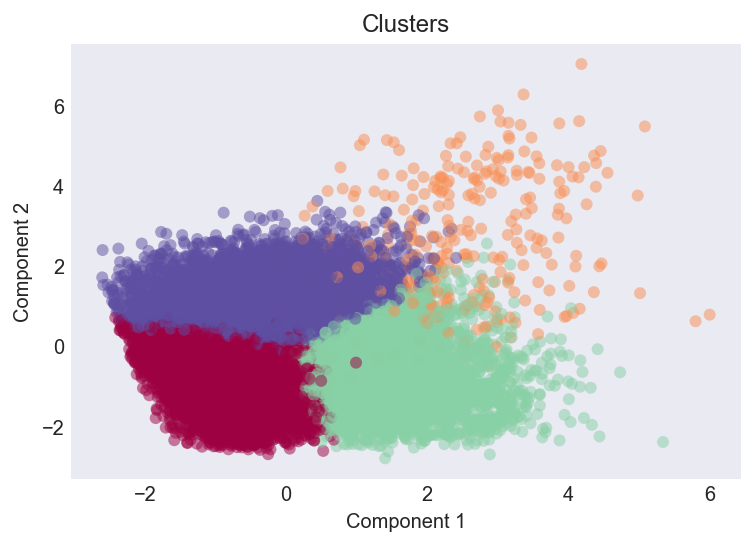

In [29]:
# fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1],
            c=y_means, 
            edgecolor="none",
            cmap=plt.cm.get_cmap("Spectral_r", 5),
            alpha=0.5)

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Clusters')
plt.show()

In [30]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ['age','income','membership_years','weekly_transactions','weekly_amount_spent'])
centroids['cluster'] = centroids.index
centroids

,age,income,membership_years,weekly_transactions,weekly_amount_spent,cluster
0,-0.318209,-0.548918,-0.728558,-0.537929,-0.551113,0
1,0.126628,0.464389,0.103239,0.517283,4.925607,1
2,-0.364470,-0.574549,0.916644,1.147261,0.100038,2
3,0.629794,1.028429,0.067225,-0.349856,0.222962,3


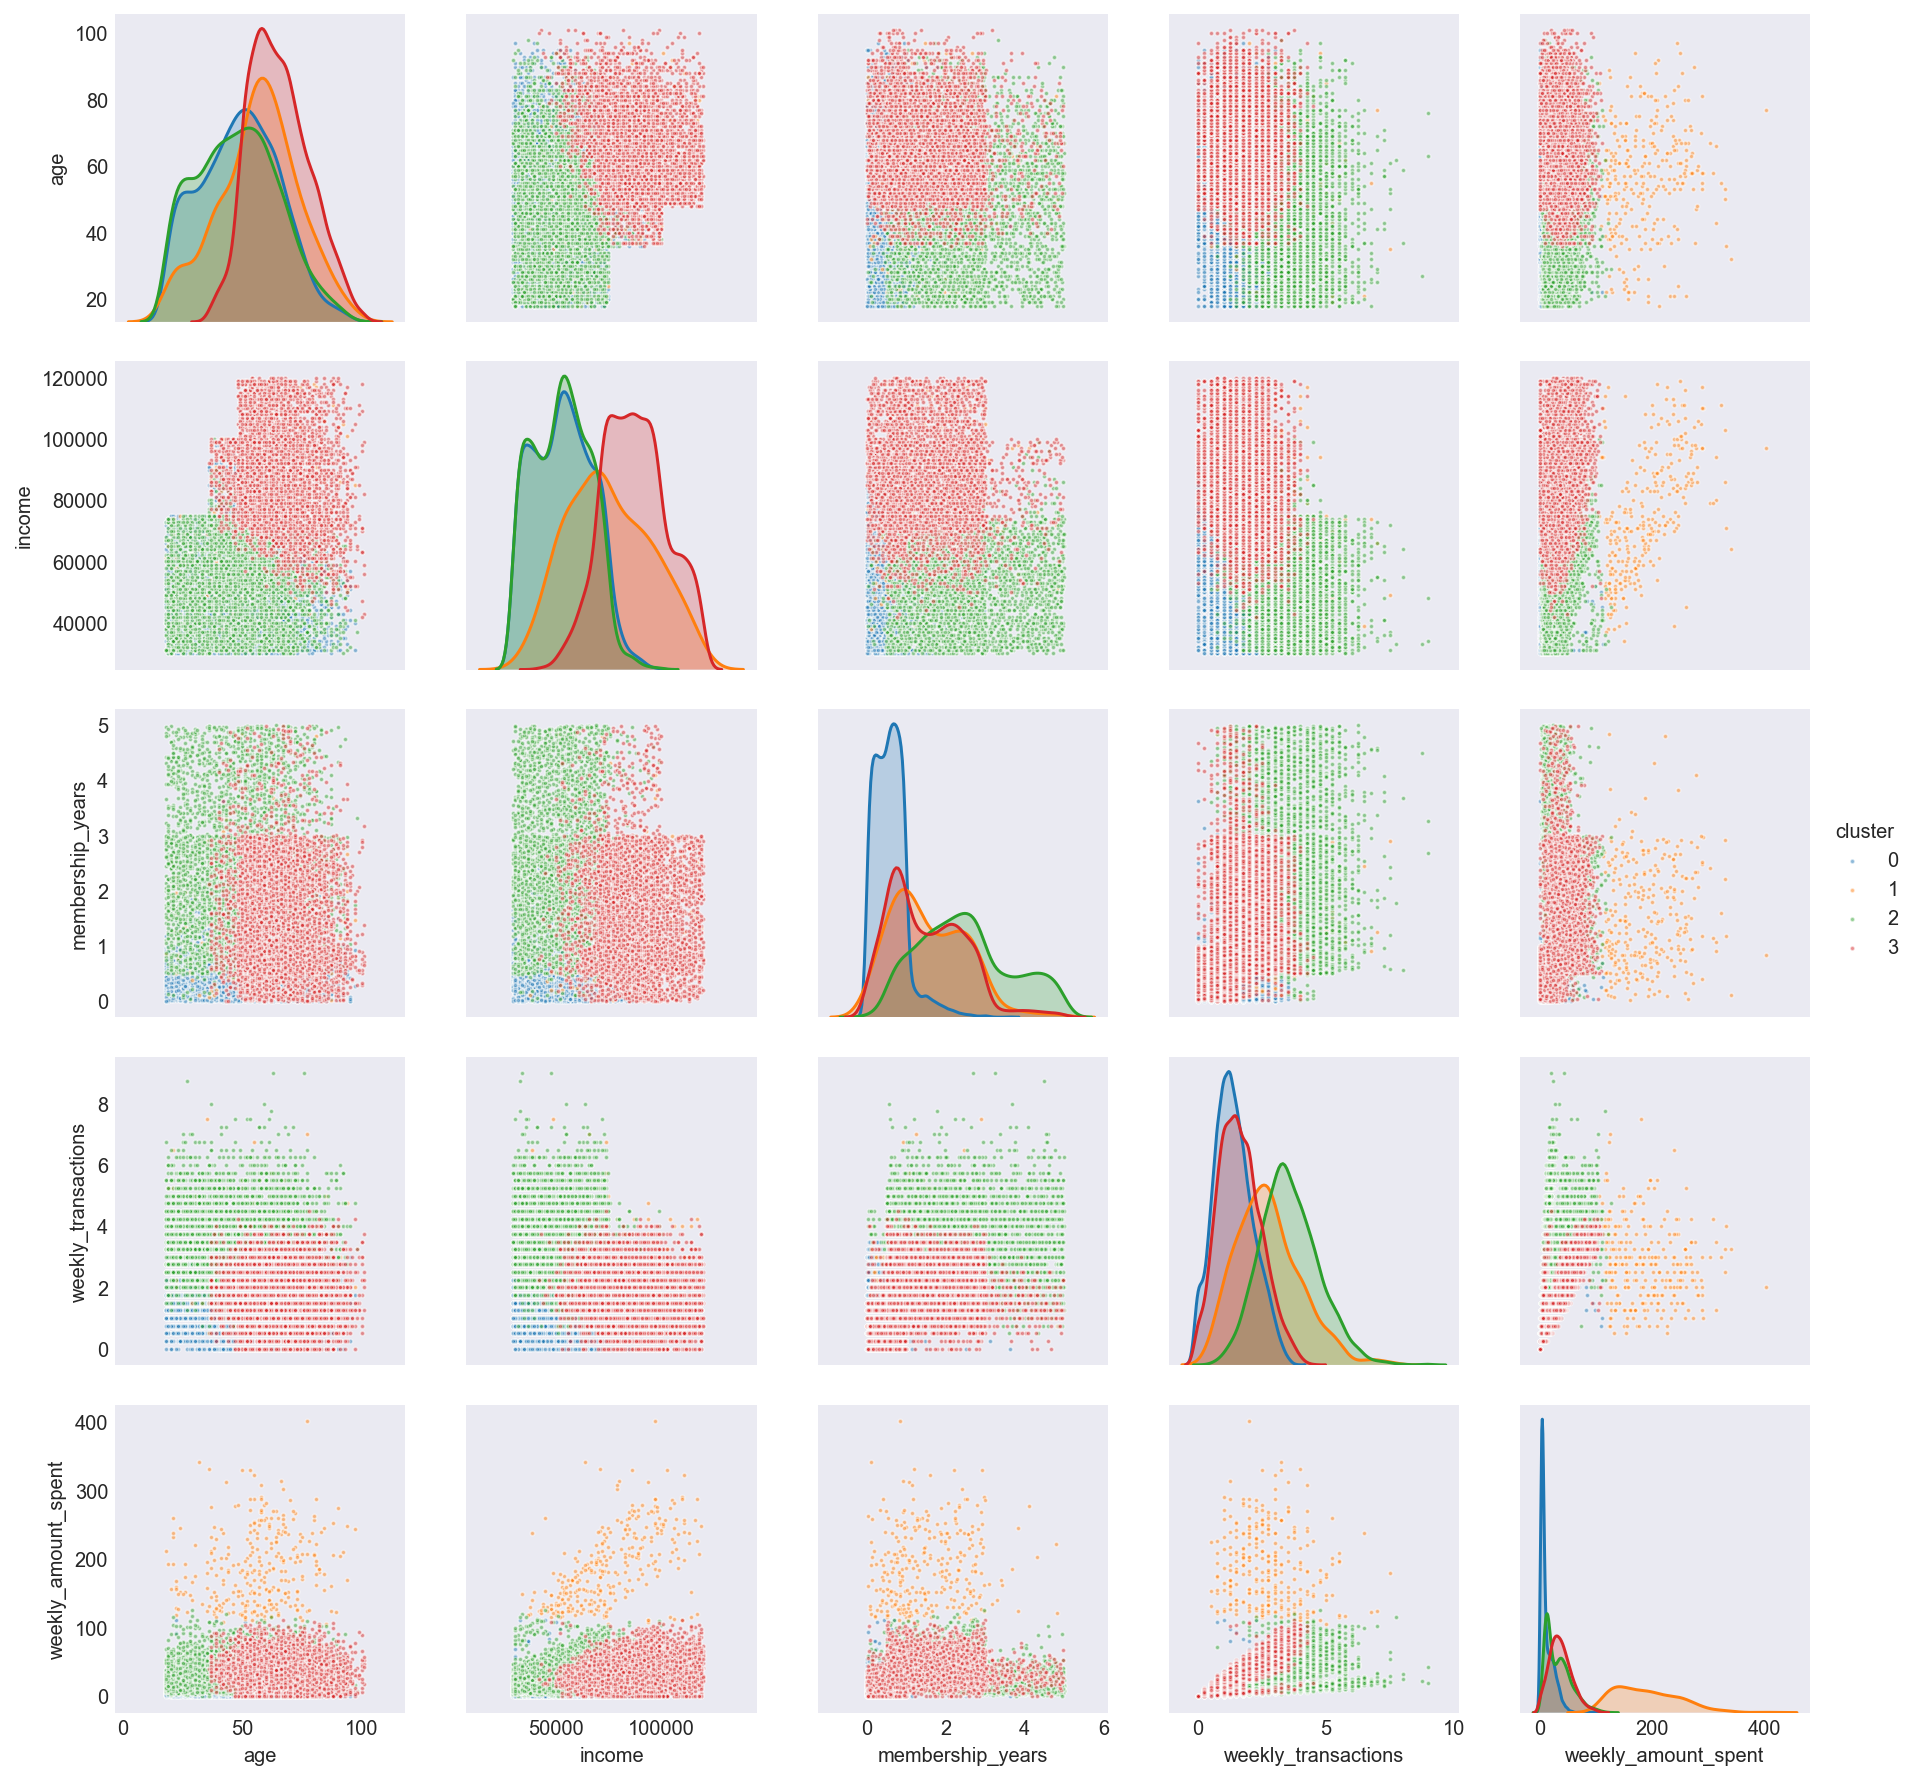

In [31]:
# Pairplot for customer demographics
sns.pairplot(customers, vars=['age','income','membership_years','weekly_transactions','weekly_amount_spent'], 
                hue='cluster',
                plot_kws={'alpha':0.5, 's':5});

# Build Machine Learning Model to classify customer response to offers

In [32]:
# Examine the ratios of target classes to decide on the classification metrics
print('valid response ratio:')
print(customers.responded.value_counts()/len(customers))

valid response ratio:
1    0.796481
0    0.203519
Name: responded, dtype: float64


In [34]:
customers

,gender,age,id,became_member_on,income,responded,not_responded,invalid_responded,membership_years,weekly_transactions,weekly_amount_spent,cluster
0,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,1,1.030137,0.75,19.2525,3
1,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,1,0,0,1.213699,1.75,39.8175,3
2,M,68.0,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,1,0,0,0.249315,0.75,14.4325,0
3,M,65.0,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,1,0,0,0.457534,0.75,9.1075,0
4,M,58.0,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,1,0,0,0.704110,1.00,3.9050,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14603,F,45.0,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,0,1,0,0.142466,1.75,5.0075,0
14604,M,61.0,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,0,0,1,0.035616,1.75,6.4925,0
14605,M,49.0,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,0,1,0,1.495890,2.00,9.9350,0
14606,F,83.0,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,1,0,0,2.386301,3.50,47.4175,2


In [35]:
# Split customers data into X and y
X = customers[['gender','age','income','membership_years','weekly_transactions','weekly_amount_spent']]

# Convert categorical features into dummy variables
X = pd.get_dummies(X)
X.head()

,age,income,membership_years,weekly_transactions,weekly_amount_spent,gender_F,gender_M
0,55.0,112000.0,1.030137,0.75,19.2525,1,0
1,75.0,100000.0,1.213699,1.75,39.8175,1,0
2,68.0,70000.0,0.249315,0.75,14.4325,0,1
3,65.0,53000.0,0.457534,0.75,9.1075,0,1
4,58.0,51000.0,0.704110,1.00,3.9050,0,1


## Plot ROC curve for model comparison
- We have 3 potential target variables to predict - responded, discount_responded, bogo_responded
- We already have good understandings of the 8 offers regarding response rates and demographics, we don't need to build a model for each offers as it could be biased due to the fact that not every customer received the same offer
- Depending on Starbuck's business objective, we can choose to predict whether the customer will respond to any offer at all; or predict whether the customer will respond to discount or bogo offers

In [36]:
def compare_roc(target):
    '''
    plot ROC for the given target variable - response/invalid response
    '''
    y = customers[target]
    # Set discount_response as the target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train three models
    log_reg = LogisticRegression().fit(X_train, y_train)
    rfc = RandomForestClassifier().fit(X_train, y_train)
    adaboost = AdaBoostClassifier().fit(X_train, y_train)

    # Plot ROC comparisons
    temp = plot_roc_curve(rfc, X_test, y_test)
    plot_roc_curve(adaboost, X_test, y_test, ax=temp.ax_)
    plot_roc_curve(log_reg, X_test, y_test, ax=temp.ax_)
    plt.title(f'ROC for {target}')

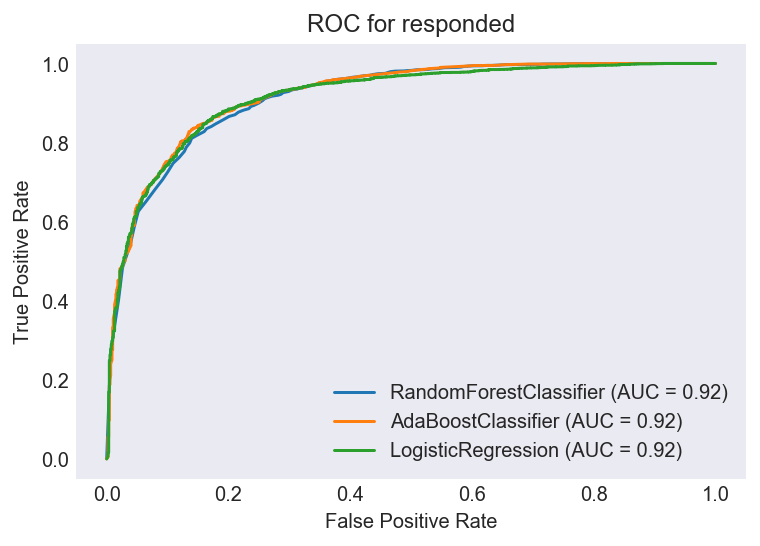

In [39]:
compare_roc('responded')

In [40]:
# Set y as response
y = customers['responded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

parameters = {
    'n_estimators': [10, 30, 50],
    'learning_rate': [0.1, 0.5, 1],
    'algorithm': ['SAMME', 'SAMME.R'],
}

model = GridSearchCV(AdaBoostClassifier(), param_grid=parameters, scoring='f1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'best parameters: {model.best_params_}')
print(f'f1 score on the testset: {f1_score(y_test, y_pred)}')
print(f'accuracy on the testset: {accuracy_score(y_test, y_pred)}')

best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 10}
f1 score on the testset: 0.9288756388415673
accuracy on the testset: 0.8856947296372347


# Conclusion
After extensive EDA and data visualizations, I have come to the conclusion that the demographics for the 3 response groups have similar patterns regardless of offer_types:
- not_responded: customers with the lowest age, lowest income, and lowest days of membership
- invalid_responded: customers with the highest age, highest income, and highest days of membership
- responded: customers with age, income and days of membership in the middle, all slightly less than the invalid_responded group

Firstly, I analyzed demographics for 3 response groups from a macro level - all offers, and found out:
- 74.4 % customers responded to at least 1 offer
- 24.54 % customers did not respond to any offer
- 1.06 % customers completed all received offers without viewing them

Secondly, I analyzed demographics for 3 response groups for discount offers VS bogo offers, and found out:
- discount offers seems to have a slightly higher response rate than bogo offers (63% verses 59%)
- The demographics of discount and bogo response groups are quite similar

Thirdly, I analyzed demographics for 3 response groups for all 8 offers, and found out:
For discount offers:
- The discount offer people love the most is discount_10_10_2, with 70.1% response rate
- The discount offer people love the least is discount_20_10_5, with 23.09% response rate
- This may be due to the fact that the favorable offer has a lower barrier (10 dollars) whereas the least favorable offer has a high minimum spend (20 dollars)
- discount_10_7_2 has a 38% response rate whereas discount_10_10_2 has a 70.1% response rate, this may suggest that an 10-day expiration period gets much more responses than a 7-day expiration period
- In conclusion, people respond better to lower minimum spend and longer expiration days

For BOGO offers:
- The BOGO offer that people love the most is bogo_5_5_5, with a 58.37% response rate
- The BOGO offer that people love the least is bogo_5_7_5, with a 39.4% response rate
- It seems to be a different case for bogo offers, such that with the same conditions, a lower expiration period resulted in higher response rate

Lastly, I built an AdaBoost Machine Learning Model to predict customer response with a 0.92 ROC AUC, 0.94 F1 score and 0.90 accuracy. Because this is an open ended project, it was difficult for me to conclude on a business impact from this model, although it is high performing. Starbucks has many reasons to send out offers, such as promoting a new drink, boosting sales, increasing customer retention and loyalty, etc. If Starbucks wants to increase sales, sending out offers will certainly increase revenue, but not neccessarily profits, unless the promotion has an impact on sales after the promotions which will increase long term profit. 

But why do we bother to predict customer response instead of sending out offers to everyone? There are a number of reasons. First of all, not everyone responds positively to offers, some may dislike them, and it would be a better idea not to send them. Secondly, Starbucks wants to know which of the 8 offers can really excite people, so they can target the right customers with the right offers to ensure best response. Lastly, 1.06% of all customers in the dataset completed the offers without viewing them, which means that they would have spent the same amount of money without the offer. By not sending offers to those customers, Starbucks can save promotion costs associated with the offers. (we know that this 1.06% are people with highest income, highest age, and longest memberships)

# Improvements
This one-month experiment has its limitations. For example, not everyone received the same offers, so we don't know if a certain customer would have responded to another offer, should he/she receive it. Also, not everyone received their first offers at the same time. Although most customers received their first offer at the beginning of the experiment, there are 6 phases where Starbucks sent out first offers to customers. This means a few things: firstly, it is not fair to use offer completion rate as a metric, because every customer got a different number of offers throughout the experiment; secondly, weekly_transactions and weekly_amount_spent should be based on the assumption that all customers are in the same state (with offers or without offers), but the discrepancies in the data can make these 2 metrics biased and not reflect the actual purchasing behaviors of customers. 